# Background 

Bellabeat is the go-to wellness brand for women with an ecosystem of products and services focused on women’s health. The company develops wearables and accompanying products that monitor biometric and lifestyle data to help women better understand how their bodies work and make healthier choices. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. 

The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.

# ASK: Business Challenge/Objective/Question

#### Goal <a class="anchor" id="goal"></a>

1. Analyzing the Fitbit Fitness Tracker Data to identify some trends and patterns in smart device usage
2. How could these trends apply to Bellabeat customers and help influence Bellabeat marketing strategy? 
3. Select one Bellabeat product to apply these insights (e.g., Bellabeat app). What features are more attractive to users?


#### Stakeholders <a class="anchor" id="stakeholders"></a>
1. **Urška Sršen** (Primary)– Bellabeat’s cofounder and Chief Creative Officer 
2. **Sando Mur** (Primary)– Mathematician and Bellabeat’s cofounder
3. **Bellabeat’s marketing analytics team** (Secondary)– a team of data analytics 

#### Deliverables <a class="anchor" id="Deliverables"></a>

1. A clear summary of the business task 
2. A description of all data sources used 
3. Documentation of any cleaning or manipulation of data 
4. A summary of your analysis 
5. Supporting visualizations and key findings 
6. Your top high-level content recommendations based on your analysis 

# PREPARE: Data generation, collection, storage, management, and data integrity

#### Data source 
FitBit Fitness Tracker Data. 
This dataset is stored in Kaggle and was published by Möbius to Kaggle.com under the CC0: Public Domain Creative Common License.

#### Tools used 
Excel, MySQL

Actually, Excel, MySQL or RStudio can be used in analyzing this case study 

#### Data organization

The datasets is downloaded in .csv file format, including 18 .csv files.

#### Data Credibility (ROCCC)

* Reliable: sampling bias might apply. Sample size of around 30 is small. a larger sample size will be more representative of the population and would increase the confidence interval. No info about how these Fitbit users were selected. Does it consider gender, age and other factors? Also, no demographic information was provided, including gender, location, age and job status.

* Original: Data source: FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius). These datasets were generated by respondents to a distributed survey via Third-party Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.

* Comprehensive: The dataset includes 18 .csv files. The datasets included 33 participants over a 31 day period of time (from 04-12-2016 to 05-12-2016).

* Current: No, The data was collected between 04-12-2016 and 05-12-2016. so the datasets are outdated and have time limitation for current trend analysis.

* Cited: Yes. The dataset was published by Möbius to Kaggle.com under the CC0: Public Domain Creative Common License. Möbius cited the dataset from Zendo: Furberg, Robert; Brinton, Julia; Keating, Michael ; Ortiz, Alexa [[Source Here] ](https://zenodo.org/record/53894#.YMoUpnVKiP9)


# PROCESS: Data cleaning and manipulation

The data in the file of dailyCalories_merged, dailyIntensities_merged, dailySteps_merged and dailySteps_merged are repeated in the dailyActivity_merged file. 

#### Data Cleaning (Excel) 
* Formated as a table
* Utilized "Text to Columns" tool to format date data into YYYY-MM-DD date format, and format the date and time value as two separate columns
* Formatted all numerical data into Number format with either no decimils or up to 2 decimials
* Utilized "Pivot Table" tool or "remove duplicate" by Id to obtain how many unique users there were within the dataset
    * Daily_Activity_Merged -- 33
    * Daily_Sleep_Merged -- 24
    * Hourly_Steps_Merged -- 33
    * Hourly_Intensity_Merged -- 33
    * Hourly_Calories_Merged -- 33
    * Heart_Rate_Merged -- 7
    * Weight_Log_Merged -- 8
* Formatted date data into YYYY-MM-DD date format 
* Removed duplicate data (3 rows of duplicate data was found and removed in the Daily_Sleep_Merged file)
* Sorted by date to indicate a 31 day period of time (from 04-12-2016 to 05-12-2016)


#### Data Cleaning (SQL)

* .csv File Import

Utilizing the MySQL Workbench “Table Data Import Wizard” to import a CSV file. To avoid data loss during import, make sure the data types of each field are reasonable, e.g. the data type of Id should be BIGINT instead of INT.

* Check # of Participants

In [ ]:
SELECT 
    COUNT(DISTINCT Id) AS Number_of_Ids
FROM 
    fitbase.daily_activity;

Repeated the SQL query above for each dataset. Heart_Rate_Merged and Weight_Log_Merged datasets do not include enough data (less than 30) for analysis. These two datasets will not be used for analysis.

* Daily_Activity_Merged -- 33
* Daily_Sleep_Merged -- 24
* Hourly_Steps_Merged -- 33
* Hourly_Intensity_Merged -- 33
* Hourly_Calories_Merged -- 33
* Heart_Rate_Merged -- 7
* Weight_Log_Merged -- 8

In [ ]:
# daily_activity Dataset:

# Change date format to YYYY-MM-DD in daily_activity
UPDATE 
    fitbase.daily_activity
SET 
    ActivityDate = DATE_FORMAT(STR_TO_DATE(ActivityDate, '%c/%e/%Y'), '%Y-%m-%d');
    
# Using GROUP BY and HAVING to check duplicates
SELECT 
    Id, ActivityDate, Calories, COUNT(*)
FROM 
    fitbase.daily_activity
GROUP BY Id, ActivityDate, Calories
HAVING COUNT(*)>1;

# Round numeric fields to 2 decimals 
UPDATE 
    fitbase.daily_activity
SET
    TotalDistance = ROUND(TotalDistance, 2),
    TrackerDistance = ROUND(TrackerDistance, 2),
    VeryActiveDistance = ROUND(VeryActiveDistance, 2),
    ModeratelyActiveDistance = ROUND(ModeratelyActiveDistance, 2),
    LightActiveDistance = ROUND(LightActiveDistance, 2);

In [ ]:
# sleep_day Dataset:

# Use GROUP BY and HAVING to check duplicates in total_sleep
SELECT 
    Id AS id,
    SleepDay AS sleep_day, 
    TotalMinutesAsleep AS total_minites_asleep,
    COUNT(*)
FROM 
    fitbase.sleep_day
GROUP BY id, sleep_day, total_minites_asleep
HAVING COUNT(*) > 1;

    
# format the date and time value as two separate columns ('5/5/2016 12:00:00 AM' to '2016-05-05' and '12:00:00 AM')
SELECT 
    Id,
    DATE_FORMAT(STR_TO_DATE(SleepDay, '%c/%e/%Y %h:%i:%s %p'), '%Y-%m-%d') AS Formatted_date,
    TIME_FORMAT(STR_TO_DATE(SleepDay, '%c/%e/%Y %h:%i:%s %p'), '%h:%i:%s %p') AS Formatted_time
FROM 
    fitbase.sleep_day;

In [ ]:
# hourly_calories dataset cleaning: 
# format the date and time values as two separate columns
SELECT 
    Id,
    DATE_FORMAT(STR_TO_DATE(ActivityHour, '%c/%e/%Y %h:%i:%s %p'), '%Y-%m-%d') AS Formatted_date,
    TIME_FORMAT(STR_TO_DATE(ActivityHour, '%c/%e/%Y %h:%i:%s %p'), '%h:%i:%s %p') AS Formatted_time,
    Calories
FROM 
    fitbase.hourly_calories;

In [ ]:
# hourly_intensities dataset cleaning:

# format the date and time values as two separate columns
# round total_intensity filed to 2 decimals

SELECT 
    Id AS id,
    DATE_FORMAT(STR_TO_DATE(ActivityHour, '%c/%e/%Y %h:%i:%s %p'), '%Y-%m-%d') AS formatted_date,
    TIME_FORMAT(STR_TO_DATE(ActivityHour, '%c/%e/%Y %h:%i:%s %p'), '%h:%i:%s %p') AS formatted_time,
    TotalIntensity AS total_intensity,
    ROUND(AverageIntensity, 2) AS formated_average_intensity
FROM 
    fitbase.hourly_intensities;


In [ ]:
# hourly_steps dataset cleaning:

# format the date and time values as two separate columns

SELECT 
    Id AS id,
    DATE_FORMAT(STR_TO_DATE(ActivityHour, '%c/%e/%Y %h:%i:%s %p'), '%Y-%m-%d') AS formatted_date,
    TIME_FORMAT(STR_TO_DATE(ActivityHour, '%c/%e/%Y %h:%i:%s %p'), '%h:%i:%s %p') AS formatted_time,
    StepTotal AS total_steps
FROM 
    fitbase.hourly_steps;

# ANALYZE (SQL & Tableau) 

In [ ]:
SELECT
    t1.number_of_logged_times,
    COUNT(t1.number_of_logged_times) AS number_of_users,
    ROUND((COUNT(t1.number_of_logged_times)/33)*100,2) AS percentage
FROM 
    (
    SELECT 
    Id,
        COUNT(Id) AS number_of_logged_times
    FROM 
        fitbase.daily_activity
    GROUP BY Id
    ) t1
    
GROUP BY t1.number_of_logged_times

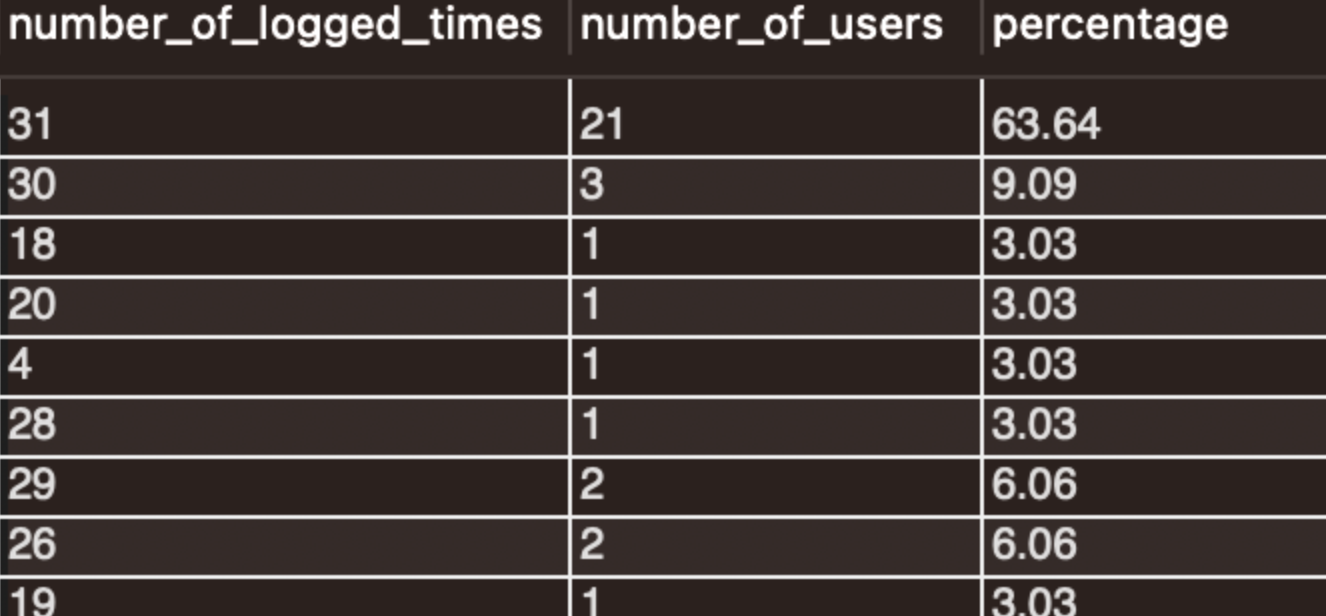
Results shows that 63.43% of users logged for the entire periods (31 days).

[https://public.tableau.com/app/profile/krystal.lin/viz/BellaBeat_daily_activities/Dashboard1#2](http://)
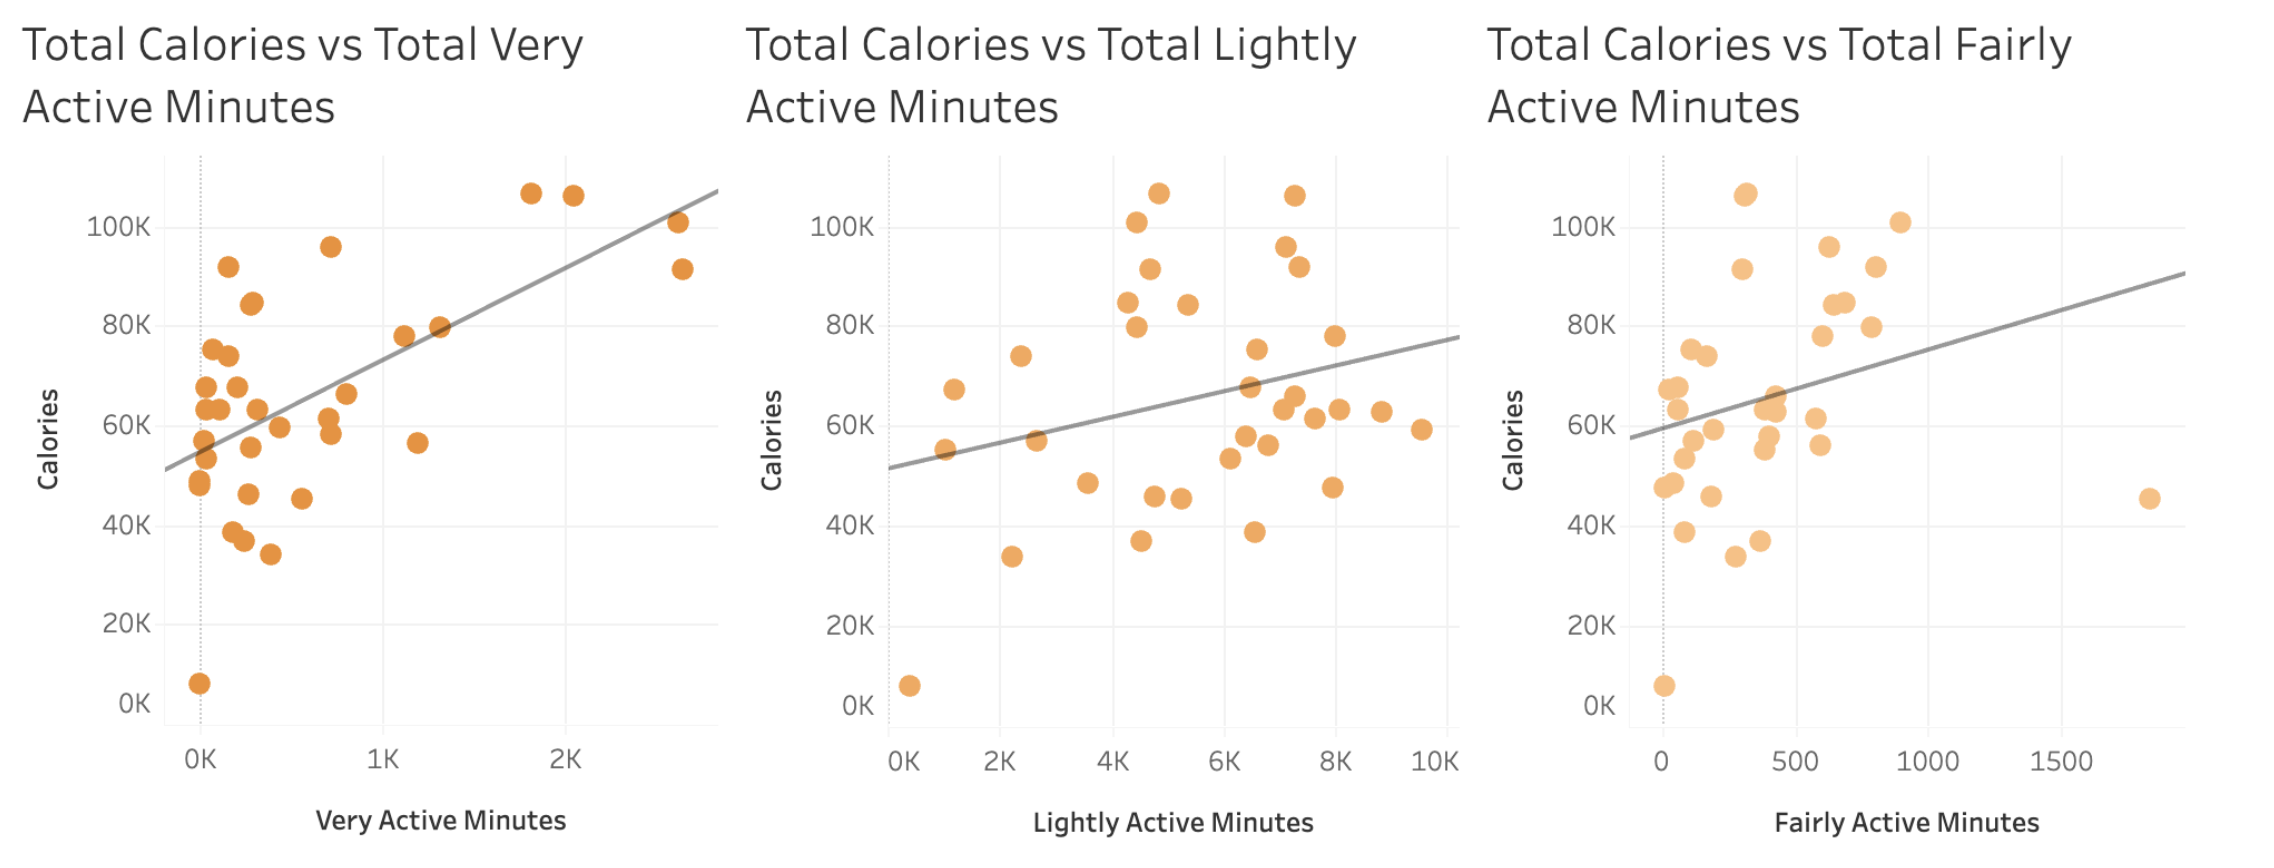

* Strong positive correlation between Very Active Minutes and Calories Consumed. The longer duration of the activity, the more calories is consumed.

    * The R-Squared value for Fairly Active graph = 0.067 
    * The R-Squared value for Lightly Active graph = 0.073 
    * The R-Squared value for Very Active graph = 0.375 

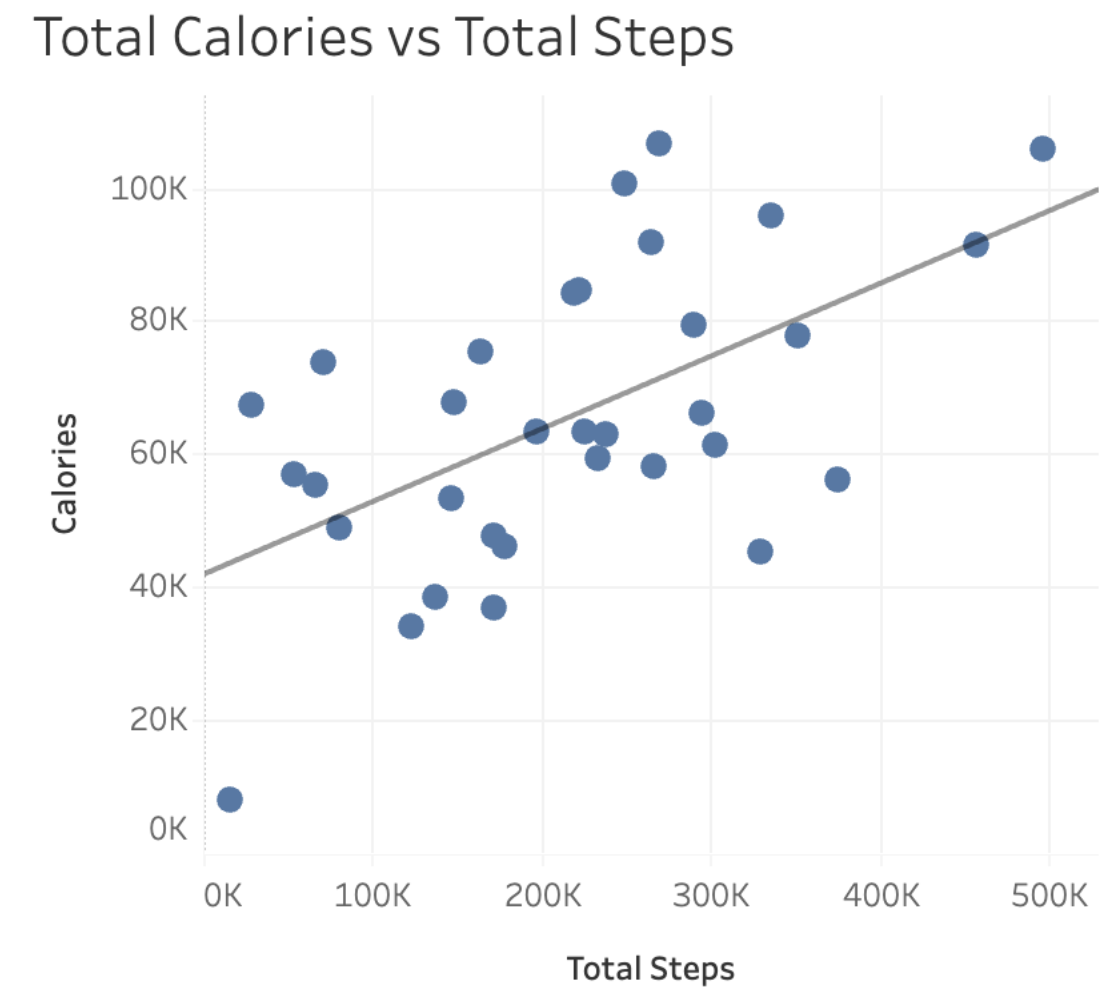
* Positive correlation here between Total Steps and Calories. The more active we are, the more calories we consume

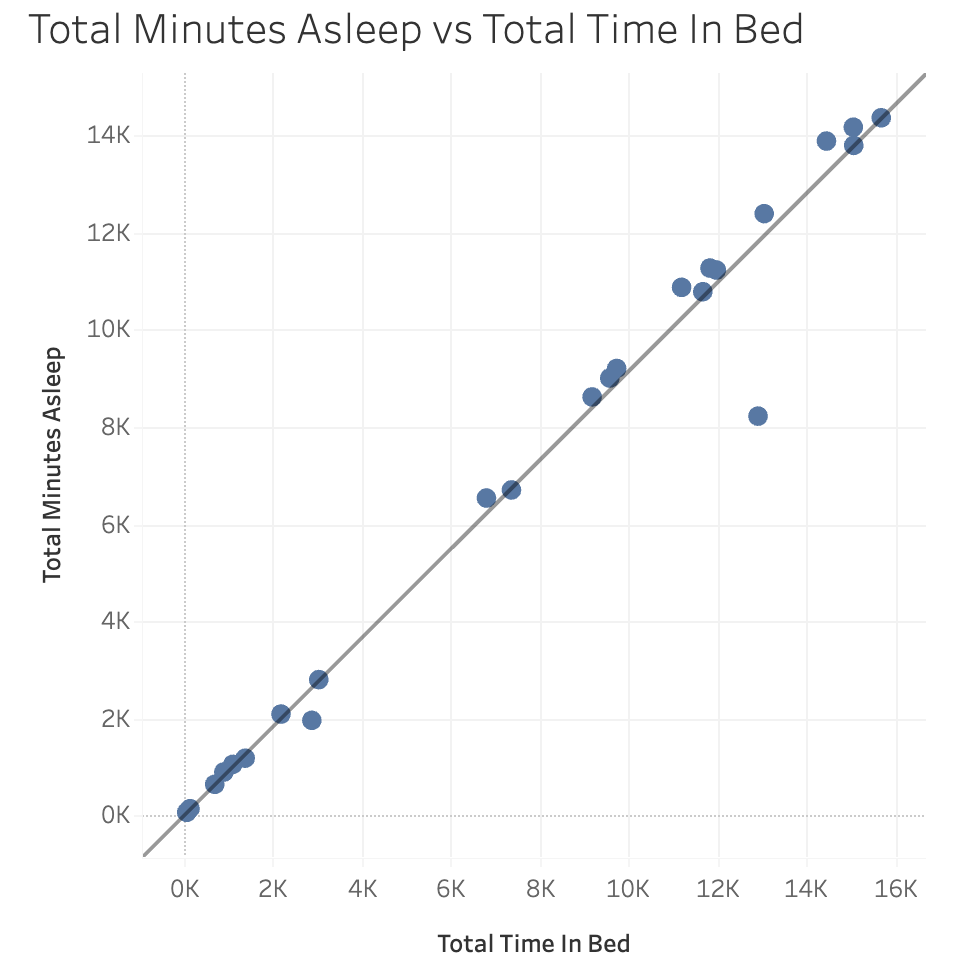
* Strong correlation between Total Minutes Asleep and Total Time in Bed (R-Squared = 0.975). 

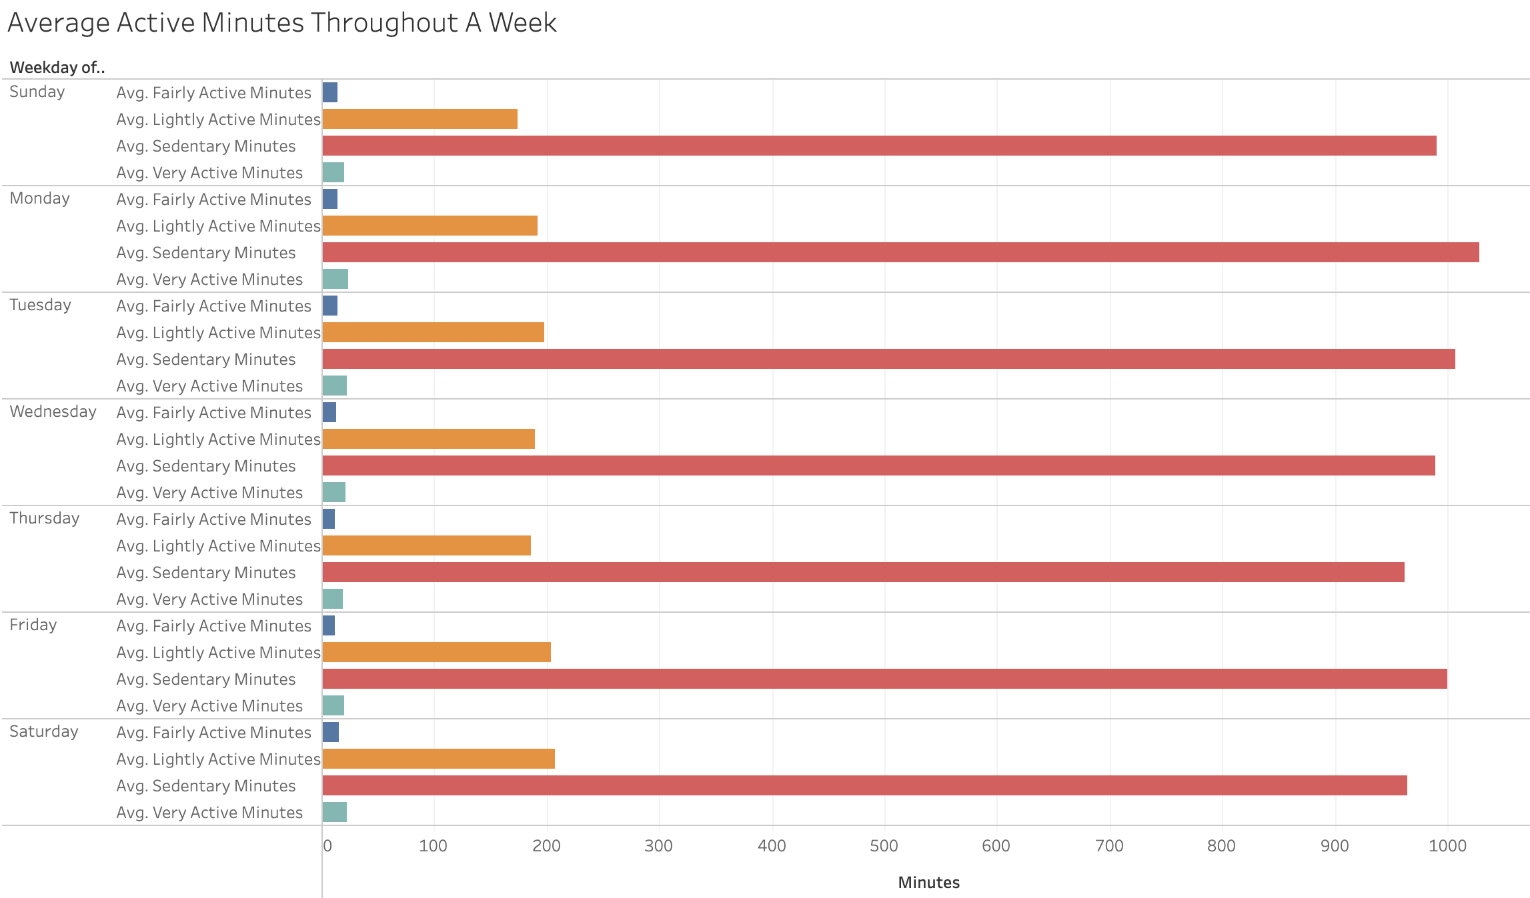
* Most users stay Sedentary on each day, regardless of whether it's a weekday or weekend

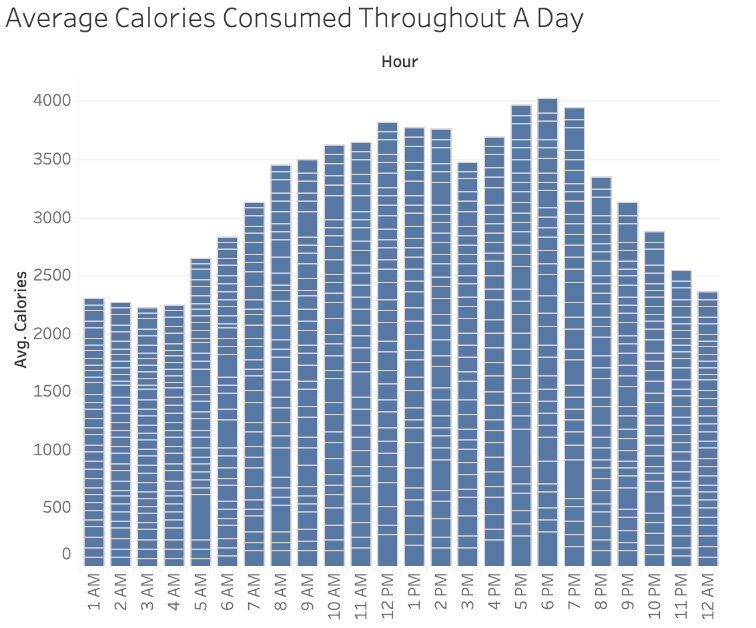
* Most users consumed more calories between 7AM and 8 PM
* Most calries were consumed between 5 pm and 7 pm 


# ACT: Conclusion and Recommendation

* Limitaion: Due to the datasets are small and can be biased since we didn't have any demographic information of users. 

#### Recommendation 

Based on our analysis, we've identified distinct patterns that could enhance the effectiveness of our online campaign and enhance the Bellabeat app：

* Daily notifications on app
    * Most calories were consumed between 5pm and 7pm. This indicates that most users have a consistant time after work to do some actitivities. It's recommeded that Bellabeat App should send an app notification to remind users to start to do some activities and to reduce sedentary time, like going for a walk or run).
    * Total Minutes Asleep and Total Time in Bed are strongly correlated. Bellabeat should consider sending an app notification to remind users want to go to bed in order to improve their sleep.
    
* Setting a goal on steps on app
    * Average total steps per day are 7638, which is lower than the suggested steps by CDC. CDC suggested that 8,000 steps per day was associated with a 51% lower risk for death from all causes. Bellabeat APP could consider setting a goal of taking 8000 steps per day for users and explain the benefits for their health at the same time

* Reward points
    * Bellabeat might explore the idea of granting users points when they achieve specific activity targets. These points could then be collected and used as a discount towards their future product purchases.